# **KNN with Elbow method with Euclidean, Hamming Distances**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits # dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier # model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [19]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**KNN with elbow method**

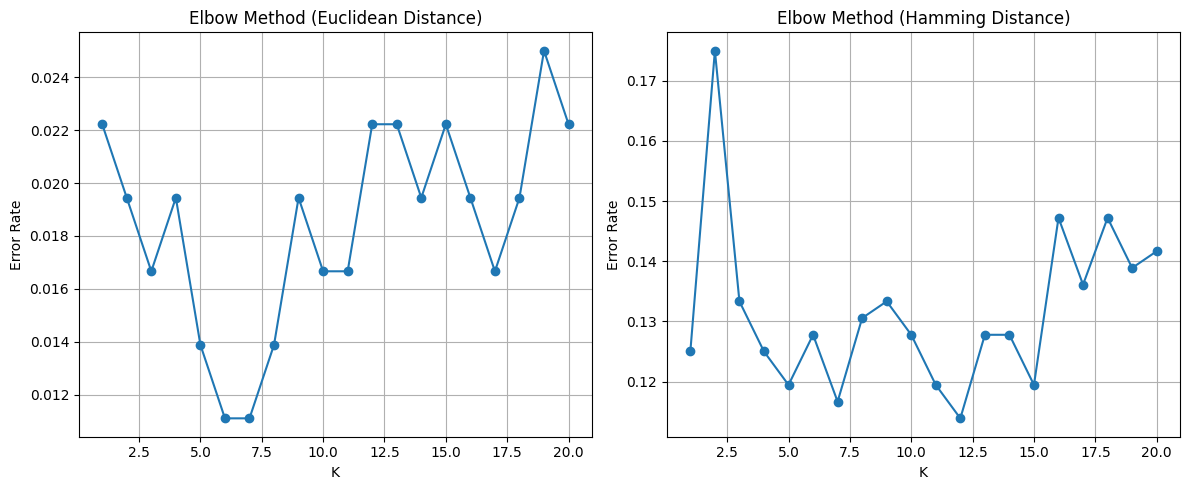

In [ ]:
best_ks = {}  # Dictionary to store the best K value for each distance metric
best_accuracies = {}  # Dictionary to store the best accuracy for each distance metric

metrics = ['euclidean', 'hamming']  # We are comparing KNN with two distance metrics

plt.figure(figsize=(12, 5))  # Set up a wide figure for plotting two subplots

for idx, metric in enumerate(metrics):  # Loop over each distance metric
    errors = []  # List to store error rates for each K
    accuracies = []  # List to store accuracy scores for each K
    k_values = range(1, 21)  # Testing K from 1 to 20

    for k in k_values:  # Loop through each K
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)  # Initialize KNN with current K and metric
        knn.fit(X_train, y_train)  # Train the model
        y_pred = knn.predict(X_test)  # Predict on test data
        acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
        accuracies.append(acc)  # Save accuracy
        errors.append(1 - acc)  # Save error (1 - accuracy)

    # Find the K with the best accuracy
    best_idx = np.argmax(accuracies)  # Index of the highest accuracy
    best_k = k_values[best_idx]  # Corresponding K value
    best_ks[metric] = best_k  # Store best K
    best_accuracies[metric] = accuracies[best_idx]  # Store best accuracy

    # Plotting the Elbow curve for current metric
    plt.subplot(1, 2, idx+1)  # Two subplots side-by-side
    plt.plot(k_values, errors, marker='o')  # Plot Error vs K
    plt.title(f"Elbow Method ({metric.capitalize()} Distance)")  # Title of subplot
    plt.xlabel("K")  # Label x-axis
    plt.ylabel("Error Rate")  # Label y-axis
    plt.grid()  # Add grid

plt.tight_layout()  # Adjust subplots nicely
plt.show()  # Display the plots


**Best K values**

In [21]:
print("Best K Values:")
for metric in metrics:
    print(f" - {metric.capitalize()} Distance: K = {best_ks[metric]}, Accuracy = {best_accuracies[metric]:.4f}")

Best K Values:
 - Euclidean Distance: K = 6, Accuracy = 0.9889
 - Hamming Distance: K = 12, Accuracy = 0.8861


**Function for all performance metrics**

In [ ]:
def evaluate_knn(X_train, X_test, y_train, y_test, k, metric):
    # Initialize the KNN model with the specified number of neighbors (k) and distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    
    # Train the KNN model using the training data
    knn.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # --- Display performance metrics on the test set ---
    print(f"\n===== {metric.upper()} DISTANCE - K={k} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))  # Calculate and display accuracy
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))  # Calculate and display macro-averaged precision
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))  # Calculate and display macro-averaged recall
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))  # Calculate and display macro-averaged F1 score
    print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Print detailed classification report

    # --- Generate and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)  # Create the confusion matrix
    plt.figure(figsize=(6, 5))  # Set figure size for clarity
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Plot heatmap of confusion matrix
    plt.xlabel('Predicted')  # Label for x-axis
    plt.ylabel('Actual')     # Label for y-axis
    plt.title(f'Confusion Matrix ({metric.capitalize()} Distance, K={k})')  # Title of the plot
    plt.show()  # Display the confusion matrix plot

    # --- Perform 5-fold cross-validation on the full dataset ---
    cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Cross-validation scores for accuracy
    print(f"Cross-Validation Scores: {cv_scores}")  # Display the list of cross-validation scores
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")  # Display the average cross-validation accuracy

    # --- Return the test set accuracy and mean cross-validation accuracy ---
    return accuracy_score(y_test, y_pred), cv_scores.mean()


**Performance Metrics for Euclidean Distance**


===== EUCLIDEAN DISTANCE - K=6 =====
Accuracy: 0.9888888888888889
Precision (macro): 0.9904028005091835
Recall (macro): 0.9899311639549436
F1 Score (macro): 0.9900986152362391

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



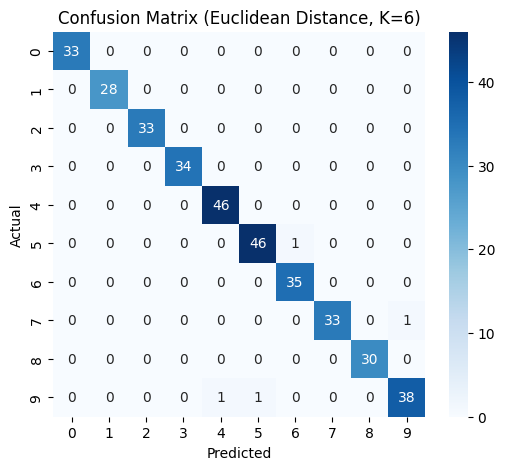

Cross-Validation Scores: [0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
Mean CV Accuracy: 0.9594


In [23]:
results = {}
acc_test, acc_cv = evaluate_knn(X_train, X_test, y_train, y_test, best_ks['euclidean'], 'euclidean')
results['euclidean'] = {'Test Accuracy': acc_test, 'CV Accuracy': acc_cv}

**Performance Metrics for Hamming Distance**


===== HAMMING DISTANCE - K=12 =====
Accuracy: 0.8861111111111111
Precision (macro): 0.9012510725010724
Recall (macro): 0.8809089613475531
F1 Score (macro): 0.8699979613226034

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       0.58      1.00      0.74        28
           2       0.94      0.91      0.92        33
           3       0.86      0.94      0.90        34
           4       1.00      0.96      0.98        46
           5       0.93      0.89      0.91        47
           6       0.94      0.97      0.96        35
           7       0.89      0.97      0.93        34
           8       1.00      0.37      0.54        30
           9       0.91      0.80      0.85        40

    accuracy                           0.89       360
   macro avg       0.90      0.88      0.87       360
weighted avg       0.91      0.89      0.88       360



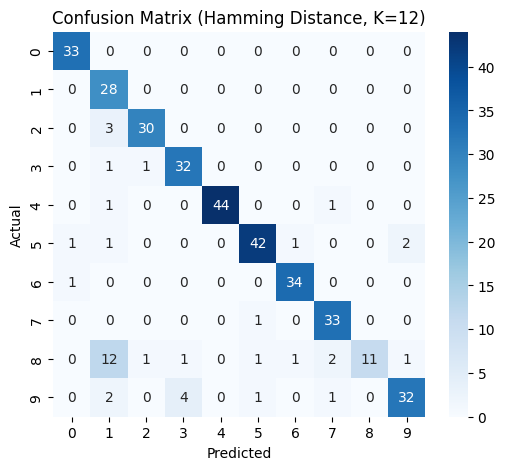

Cross-Validation Scores: [0.77777778 0.78333333 0.87465181 0.86908078 0.80222841]
Mean CV Accuracy: 0.8214


In [24]:
acc_test, acc_cv = evaluate_knn(X_train, X_test, y_train, y_test, best_ks['hamming'], 'hamming')
results['hamming'] = {'Test Accuracy': acc_test, 'CV Accuracy': acc_cv}

**Comparison b/w Euclidean and Hamming Distance**

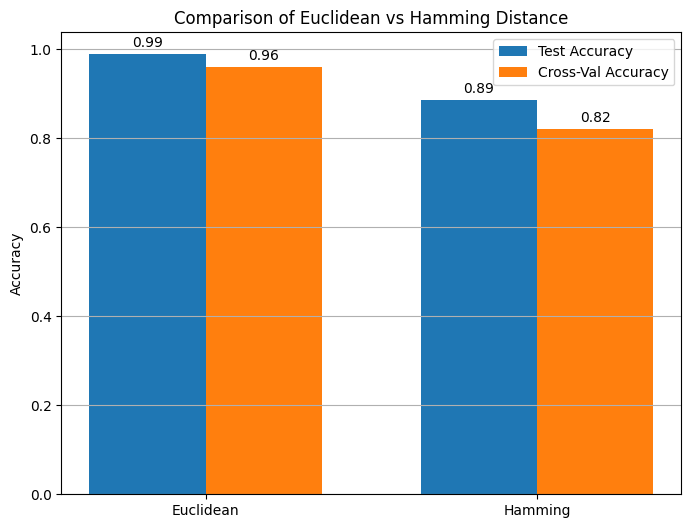

In [25]:
# ==== Comparison Plot ====
labels = ['Euclidean', 'Hamming']
test_acc = [results['euclidean']['Test Accuracy'], results['hamming']['Test Accuracy']]
cv_acc = [results['euclidean']['CV Accuracy'], results['hamming']['CV Accuracy']]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, test_acc, width, label='Test Accuracy')
bars2 = ax.bar(x + width/2, cv_acc, width, label='Cross-Val Accuracy')

# Add labels
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Euclidean vs Hamming Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()